# Iterative Archetypal Analysis on MNIST Data Set

Author: Jonathan Yik Chang Ting

Date: 12/03/24

In [10]:
import os
import random

from array import array
import matplotlib.pyplot as plt
import numpy as np
import struct

os.chdir('/scratch/q27/jt5911')

In [8]:
class MNISTdataLoader(object):
    def __init__(self, trainImagesFilepath, trainLabelsFilepath, testImagesFilepath, testLabelsFilepath):
        self.trainImagesFilepath = trainImagesFilepath
        self.trainLabelsFilepath = trainLabelsFilepath
        self.testImagesFilepath = testImagesFilepath
        self.testLabelsFilepath = testLabelsFilepath
    
    def readImagesLabels(self, imagesFilepath, labelsFilepath):        
        labels = []
        with open(labelsFilepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(imagesFilepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            imageData = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(imageData[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img
        
        return images, labels
            
    def load_data(self):
        xTrain, yTrain = self.readImagesLabels(self.trainImagesFilepath, self.trainLabelsFilepath)
        xTest, yTest = self.readImagesLabels(self.testImagesFilepath, self.testLabelsFilepath)
        return (xTrain, yTrain), (xTest, yTest)

In [6]:
# Helper function to show a list of images with their relating titles
def showImages(images, titleTexts):
    cols = 5
    rows = int(len(images) / cols) + 1
    
    plt.figure(figsize=(30, 20))
    index = 1  
    for x in zip(images, titleTexts):        
        image = x[0]        
        titleText = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (titleText != ''):
            plt.title(titleText, fontsize = 15);        
        index += 1

In [11]:
# Set file paths based on added MNIST Datasets
DATA_DIR = f"{os.getcwd()}/data"
MNIST_DIR = f"{DATA_DIR}/mnist"
trainImagesFilepath = os.path.join(MNIST_DIR, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
trainLabelsFilepath = os.path.join(MNIST_DIR, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
testImagesFilepath = os.path.join(MNIST_DIR, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
testLabelsFilepath = os.path.join(MNIST_DIR, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

# Load MINST dataset
dataLoader = MNISTdataLoader(trainImagesFilepath, trainLabelsFilepath, testImagesFilepath, testLabelsFilepath)
(xTrain, yTrain), (xTest, yTest) = dataLoader.load_data()

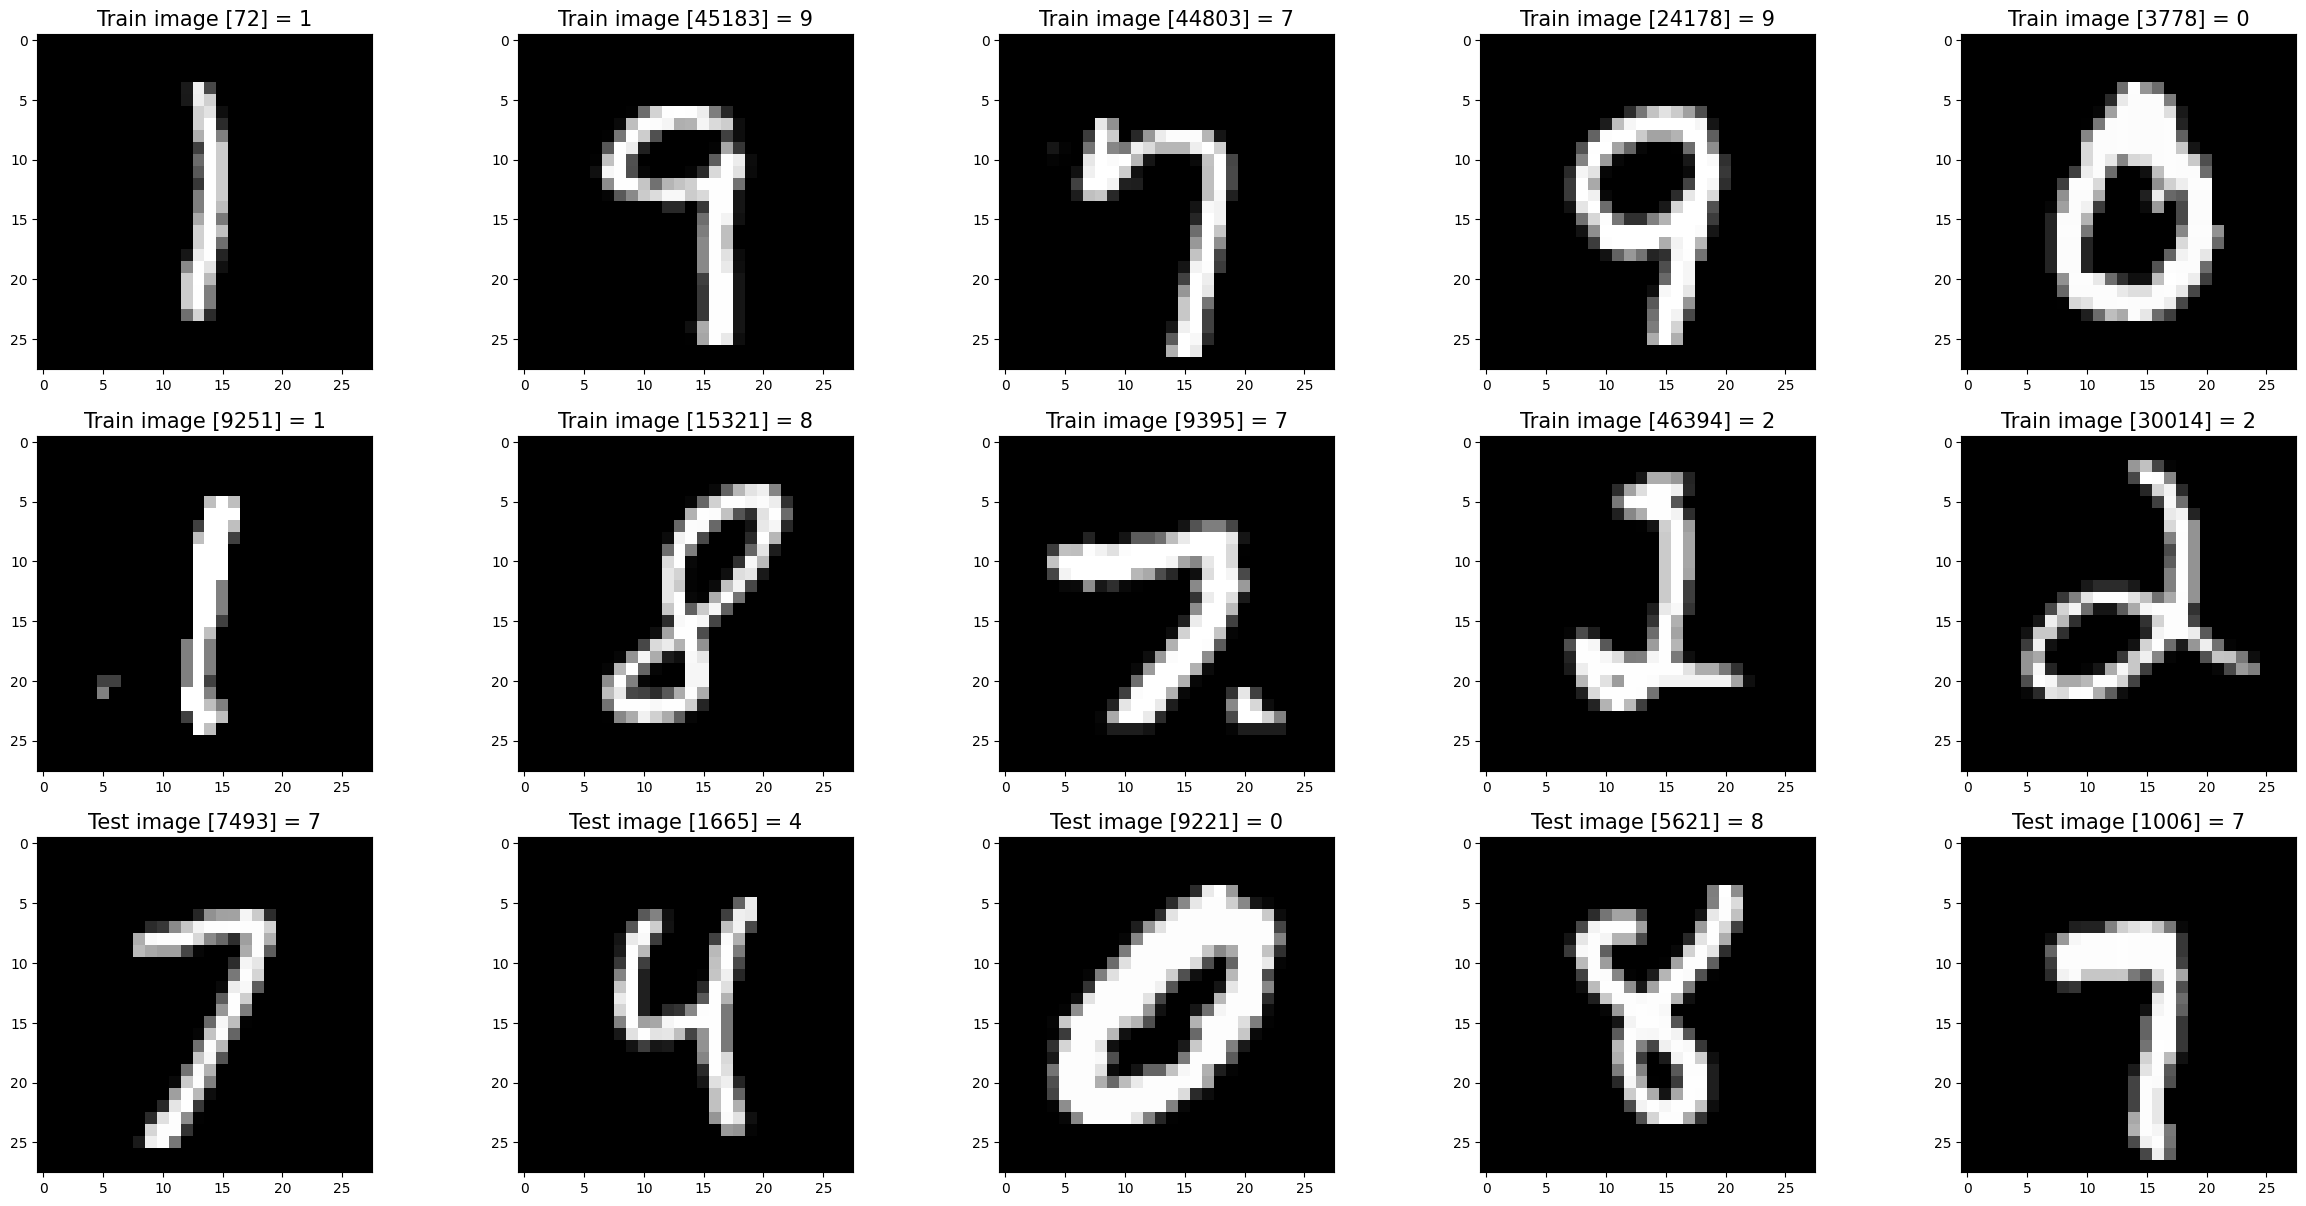

In [12]:
# %matplotlib inline
# Show some random training and test images 
imagesToShow = []
titlesToShow = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    imagesToShow.append(xTrain[r])
    titlesToShow.append('Train image [' + str(r) + '] = ' + str(yTrain[r]))    
for i in range(0, 5):
    r = random.randint(1, 10000)
    imagesToShow.append(xTest[r])        
    titlesToShow.append('Test image [' + str(r) + '] = ' + str(yTest[r]))    
showImages(imagesToShow, titlesToShow)

In [21]:
print(f"Number of training samples: {len(xTrain)}")
print(f"Number of testing samples: {len(xTest)}")

Number of training samples: 60000
Number of testing samples: 10000
